<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/4.5%20%E4%BB%8E%20%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%20%E5%88%B0%20%E7%9B%AE%E6%A0%87%E8%A7%84%E5%88%92%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

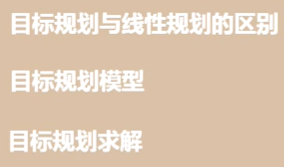

## 线性规划

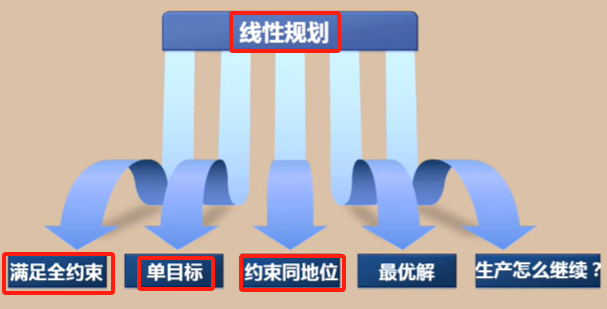

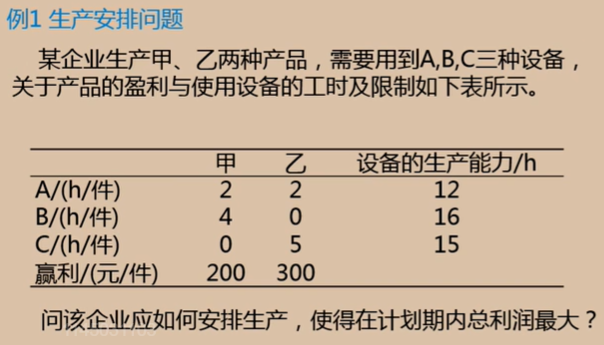

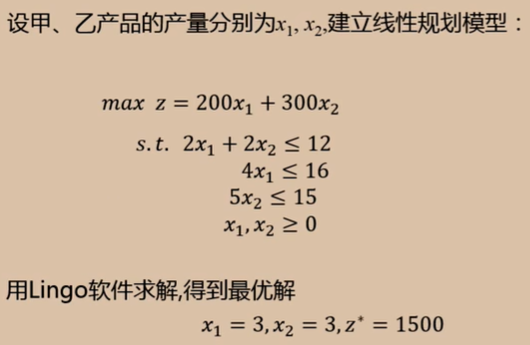

### 用 pulp 库求解

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 44.6 MB/s eta 0:00:00


In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *

prob = LpProblem("用 PuLP 求解线性规划问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("甲产品的产量 x1", 0, None, LpInteger) # 要求为整数 , LpInteger
x2 = LpVariable("乙产品的产量 x2", 0, None, LpInteger)


# 增加 目标函数
prob += 200 * x1 + 300 * x2

# 添加约束
prob += 2 * x1 + 2 * x2 <= 12
prob += 4 * x1 <= 16
prob += 5 * x2 <= 15

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("总利润最大为： ", value(prob.objective))

求解状态: Optimal
乙产品的产量_x2 = 3.0
甲产品的产量_x1 = 3.0
总利润最大为：  1500.0


### 用 scipy.optimize.linprog  求解

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-200, -300] # 目标函数的参数系数 最小化
A = [[2, 2],
    [4, 0],
    [0, 5]]  #   # 约束中 等式或不等式 的参数系数
b = [12, 16, 15]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2, integrality=1) # integrality=1 参数为整数
print("目标的最大值：", -res.fun)  # 默认返回最小值 余料的米数
print("最优参数 x =", res.x)
print("是否优化成功：", res.message)

目标的最大值： 1500.0
最优参数 x = [3. 3.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


### 用 cvxpy 库求解

In [1]:
!pip install cvxpy

In [2]:
# 库函数官方示例：https://www.cvxpy.org/examples/index.html

# !pip install cvxpy

import cvxpy as cp
import numpy as np
#输入目标函数系数
c = np.array([200, 300] )  # 目标的参数系数

x = cp.Variable(2, integer=True) # 构造决策变量
# 构造目标函数
obj = cp.Maximize( cp.sum( x @ c ) )  # 最大化 Maximize   最小化 Minimize

# 输入约束条件
A = np.array([[2, 2],
        [4, 0],
        [0, 5]])
b = np.array([12, 16, 15])
constraints = [ A @ x <= b,
         x >= 0]  # 将非负约束加到约束里，极大加快求解速度
prob = cp.Problem(obj, constraints)  #  构造模型
prob.solve()  #  模型求解
print("是否优化成功：", prob.status)
print("最大值：", prob.value)
print("最优参数：", x.value)

是否优化成功： optimal
最大值： 1500.0
最优参数： [3. 3.]


## 目标规划

一些实际问题：最优解可能不存在，约束的地位不同，有多个目标

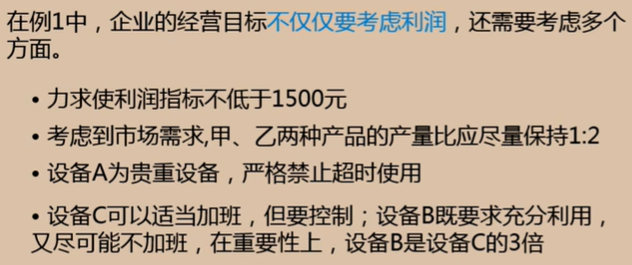

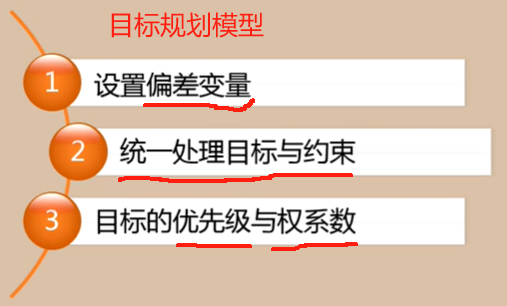

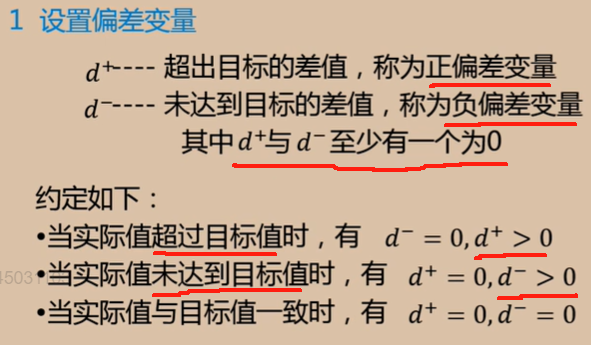

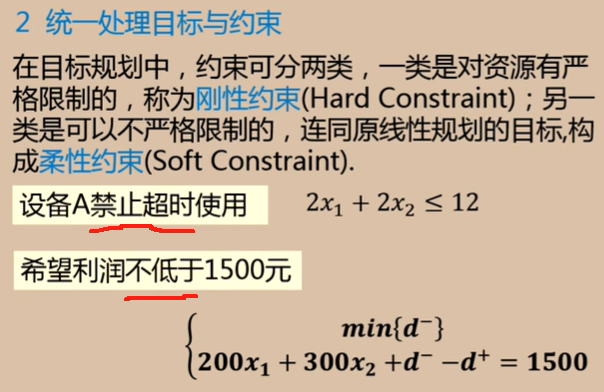

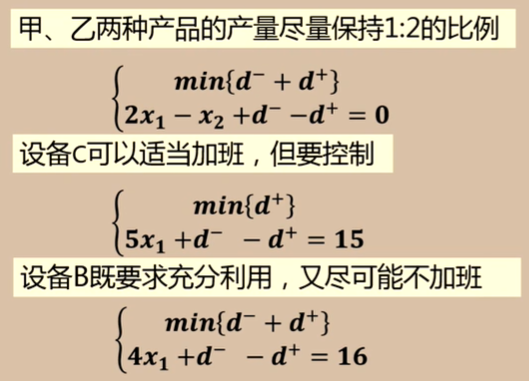

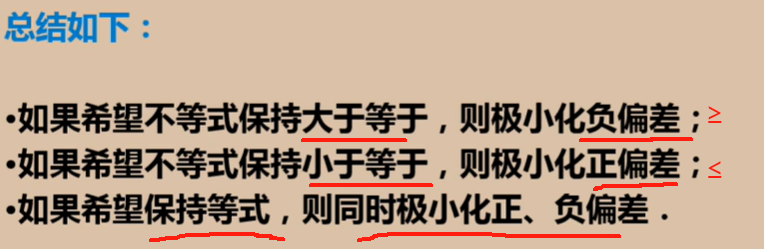

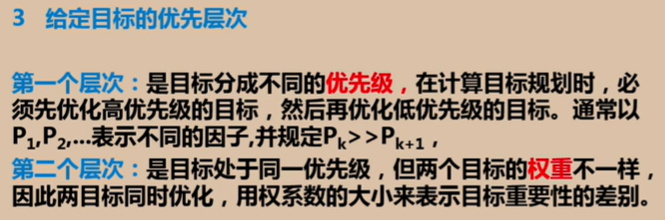

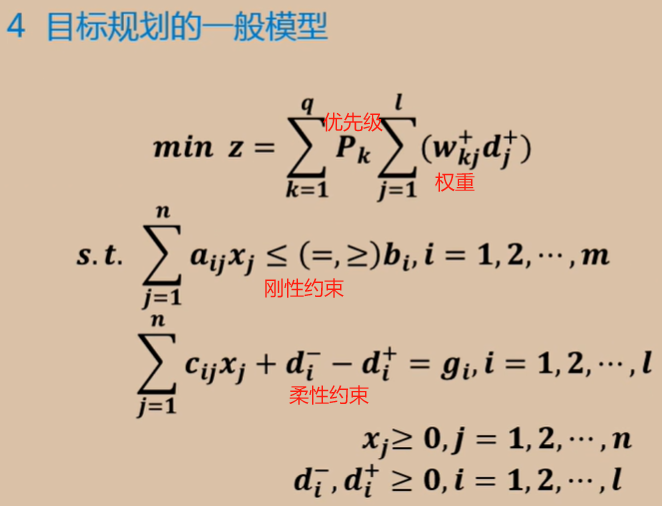

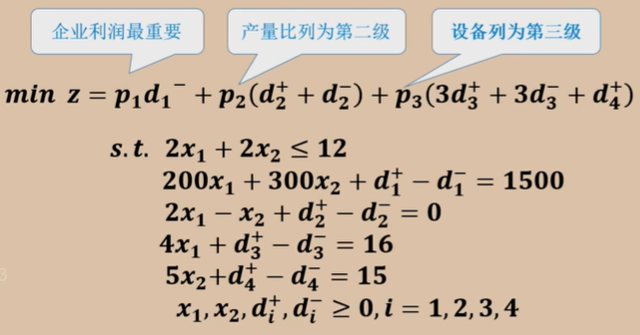

### 线性加权法

In [ ]:
# 权重分析

# https://www.cvxpy.org/tutorial/index.html

import numpy as np
import cvxpy as cp
import pandas as pd

# cvxpy 库要求 目标函数都是 min 形式

c1 = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])  #
c2 = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])
c3 = np.array([0, 0, 0, 0, 0, 0, 3, 3, 1, 0])
A = np.array([[2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [200, 300, 1, -1, 0, 0, 0, 0, 0, 0],
        [2, -1, 0, 0, 1, -1, 0, 0, 0, 0],
        [4, 0, 0, 0, 0, 0, 1, -1, 0, 0],
        [0, 5, 0, 0, 0, 0, 0, 0, 1, -1]])  # 约束统一为 <= 的形式
b = np.array([12, 1500, 0, 16, 15])
x = cp.Variable(10, pos=True)  # 要求参数为正

## 线性加权法求解
df = pd.DataFrame({"P1":[], "P2":[], "P3":[], "利润(>=1500)":[], "乙甲产量比(=2)":[], \
           "设备 A 时长(<=12)":[], "设备 B 时长(=16)":[],"设备 C 时长(可略大于15)":[],"甲的产量":[], "乙的产量":[]})

for P1 in np.arange(0, 1.1, 0.001):
  for P2 in np.arange(0, 1.1, 0.001):
    for P3 in np.arange(0, 1.1, 0.001):
      if P1 + P2 + P3 == 1:
        obj = cp.Minimize((P1 * c1 + P2 * c2 + P3 * c3) @ x)
        constraints = [A @ x <= b]
        prob = cp.Problem(obj, constraints)
        prob.solve()
        df = pd.concat([df, pd.DataFrame({"P1":[P1], "P2":[P2], "P3":[P3], \
                          "利润(>=1500)": [ np.array([200, 300]) @ [round(x.value[0]), round(x.value[1])] ], \
                          "乙甲产量比(=2)": [ round(x.value[1]) / round(x.value[0])],\
                          "设备 A 时长(<=12)": [ np.array([2, 2]) @ [round(x.value[0]), round(x.value[1])] ],\
                          "设备 B 时长(=16)": [ np.array([4, 0]) @ [round(x.value[0]), round(x.value[1])] ],\
                          "设备 C 时长(可略大于15)": [ np.array([0, 5]) @ [round(x.value[0]), round(x.value[1])] ],
                          "甲的产量":[round(x.value[0])], "乙的产量":[round(x.value[1])]})])

df

,P1,P2,P3,利润(>=1500),乙甲产量比(=2),设备 A 时长(<=12),设备 B 时长(=16),设备 C 时长(可略大于15),甲的产量,乙的产量
0,0.000,0.000,1.000,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.000,0.001,0.999,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
0,0.000,0.002,0.998,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
0,0.000,0.003,0.997,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
0,0.000,0.004,0.996,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
0,0.998,0.001,0.001,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
0,0.998,0.002,0.000,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0
0,0.999,0.000,0.001,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.999,0.001,0.000,1100.0,3.000000,8.0,4.0,15.0,1.0,3.0


In [ ]:
df.nlargest(7, '利润(>=1500)')

,P1,P2,P3,利润(>=1500),乙甲产量比(=2),设备 A 时长(<=12),设备 B 时长(=16),设备 C 时长(可略大于15),甲的产量,乙的产量
0,0.55,0.09,0.36,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.56,0.09,0.35,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.57,0.09,0.34,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.61,0.09,0.30,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.62,0.09,0.29,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.97,0.03,0.00,1300.0,1.500000,10.0,8.0,15.0,2.0,3.0
0,0.00,0.00,1.00,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0


In [ ]:
df[df["利润(>=1500)"] == 1200 ]

,P1,P2,P3,利润(>=1500),乙甲产量比(=2),设备 A 时长(<=12),设备 B 时长(=16),设备 C 时长(可略大于15),甲的产量,乙的产量
0,0.0,0.0,0.0,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.0,0.0,0.1,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.0,0.0,0.2,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.0,0.0,0.3,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,0.0,0.0,0.4,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
0,1.0,0.0,0.6,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,1.0,0.0,0.7,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,1.0,0.0,0.8,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0
0,1.0,0.0,0.9,1200.0,0.666667,10.0,12.0,10.0,3.0,2.0


### 序贯法

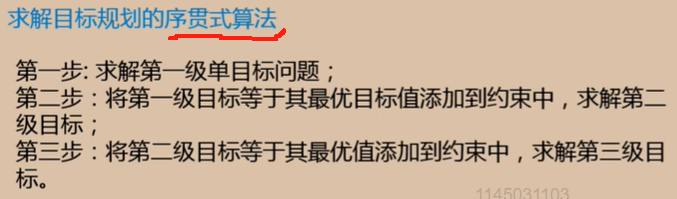